# P5 - Optimisez la gestion des données d'une boutique avec R ou Python

## Préparation

* Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

* Importation des fichiers

In [ ]:
erp = pd.read_excel('erp.xlsx', index_col=None)

In [ ]:
web = pd.read_excel('web.xlsx',index_col=None)

In [ ]:
liaison = pd.read_excel('liaison.xlsx', index_col=None)

* Affichage des fichiers

In [5]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [6]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [7]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


* Renommer une colonne d'un dataframe

In [8]:
liaison.rename(columns={"id_web":'sku'},inplace=True)

## Vérification et Analyse des clés

* Vérification du nombre de clés uniques

In [9]:
liaison['product_id'].nunique()

825

In [10]:
liaison['sku'].nunique()

734

* Vérification du nombre de valeurs manquantes

In [11]:
liaison['sku'].isnull().sum()

91

* Affichage du nombre de lignes dans le dataframe

In [12]:
len(liaison)

825

* Vérification du nobre de clés uniques

In [13]:
erp['product_id'].nunique()

825

* Affichage du nombre de valeurs manquantes

In [14]:
erp['product_id'].isnull().sum()

0

* Affichage du nombre de lignes dans le dataframe

In [15]:
len(erp)

825

* Affichage du nombre de clés uniques

In [16]:
web['sku'].nunique()

714

* Affichage du nombre de valeurs manquantes

In [17]:
web['sku'].isnull().sum()

85

* Affichage du nombre de lignes dans le dataframe

In [18]:
len(web)

1513

* Vérification du nombre de clés uniques distintes d'un dataframe à un autre pour une même colonne

In [19]:
print(set(web['sku'].unique()) - set(liaison['sku'].unique()))
print(set(liaison['sku'].unique()) - set(web['sku'].unique()))

set()
{13577, 14730, 15630, 14360, 15272, 14377, 15529, 14379, 15154, 14648, 12601, 14785, '14680-1', 13771, 15065, 14689, 15586, 15608, 15609, 14715}


In [20]:
print(set(erp['product_id'].unique()) - set(liaison['product_id'].unique()))
print(set(liaison['product_id'].unique()) - set(erp['product_id'].unique()))

set()
set()


## Requêtes

* Création d'un dataframe issu de deux tables

In [21]:
data = liaison.merge(web, how="outer")
data.head()

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,15298,0.0,0.0,0.0,0.0,6.0,NaN,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3849,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3849,15296,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,3850,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [22]:
data = data[data['post_type'] == 'product']
data

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,3849,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,3850,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
6,4032,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
8,4039,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,6930,16135,0.0,0.0,0.0,0.0,5.0,taxable,NaN,2.0,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9174,7023,15891,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9176,7025,15887,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
9178,7247,13127-1,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


* Création d'un dataframe issu d'un dataframe et une table

In [23]:
newdata = data.merge(erp, how="outer")
newdata.head()

,product_id,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,...,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,onsale_web,price,stock_quantity,stock_status
0,3847,15298,0.0,0.0,0.0,0.0,6.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,24.2,0,outofstock
1,3849,15296,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,34.3,0,outofstock
2,3850,15300,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,20.8,0,outofstock
3,4032,19814,0.0,0.0,0.0,0.0,3.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,14.1,0,outofstock
4,4039,19815,0.0,0.0,0.0,0.0,0.0,taxable,NaN,2.0,...,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,1,46.0,0,outofstock


### Le chiffre d'affaire par produit

* Création d'une colonne 'chiffres d'affaires' à partir du prix à l'unité et le total des ventes

In [24]:
newdata['chiffres d\'affaires'] = newdata['price']* newdata['total_sales']

* Affichage du chiffres d'affaires par produit en ordre décroissant

In [25]:
newdata[['product_id','chiffres d\'affaires']].groupby(by='product_id').sum().sort_values('chiffres d\'affaires', ascending=False)

,chiffres d'affaires
product_id,
4334,4704.0
4144,4263.0
4402,2288.0
4142,1590.0
4141,1560.0
...,...
4874,0.0
4869,0.0
4864,0.0


### Le total du chiffre d'affaires réalisé en ligne

In [26]:
newdata['chiffres d\'affaires'].sum()

70568.6

## Vérification de l'existence d'outliers

#### Méthode de l'écart interquartile

In [27]:
np.percentile(erp['price'],[25,75])

array([14.6, 42. ])

In [28]:
newdata['price'].describe()

count    916.000000
mean      32.574891
std       26.195628
min        5.200000
25%       15.300000
50%       25.500000
75%       42.200000
max      225.000000
Name: price, dtype: float64

In [29]:
q1, q3= np.percentile(erp['price'],[25,75])
iqr = q3 - q1
print(iqr)

27.4


In [30]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
print(lower_bound)
print(upper_bound)

-26.499999999999993
83.1


In [31]:
out_upper_bound = erp.loc[erp['price'] > upper_bound]
print(out_upper_bound.sort_values('price',ascending=False))

     product_id  onsale_web  price  stock_quantity stock_status
208        4352           1  225.0               0   outofstock
460        5001           1  217.5              20      instock
635        5892           1  191.3              10      instock
227        4402           1  176.0               8      instock
598        5767           1  175.0              12      instock
230        4406           1  157.0               3      instock
242        4594           1  144.0               0   outofstock
411        4904           1  137.0              13      instock
697        6126           1  135.0              10      instock
210        4355           1  126.5               2      instock
556        5612           1  124.8              12      instock
651        5917           1  122.0               4      instock
712        6216           1  121.0               6      instock
709        6213           1  121.0               7      instock
703        6202           1  116.4      

In [32]:
print('Le nombre d\'outliers est', len(out_upper_bound))

Le nombre d'outliers est 37


In [33]:
out_lower_bound = erp.loc[erp['price'] < lower_bound]
print(out_lower_bound)
print('Le nombre d\'outliers est', len(out_lower_bound))

Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []
Le nombre d'outliers est 0


#### Méthode avec Zscore

In [34]:
mean = np.mean(erp['price'])
std = np.std(erp['price'])
print('mean du dataframe est', mean)
print('std. deviation est', std)

mean du dataframe est 32.41563636363638
std. deviation est 26.779604366935427


In [35]:
threshold = 2
outlier = []
for i in erp['price']:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('Les outliers dans le dataframe sont ', outlier)

Les outliers dans le dataframe sont  [86.1, 100.0, 88.4, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 109.6, 144.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 93.0, 122.0, 114.0, 135.0, 105.6, 116.4, 115.0, 121.0, 99.0, 115.0, 121.0, 92.0]


In [36]:
print('Le nombre d\'outliers est', len(outlier))

Le nombre d'outliers est 34


* Visualisation des données avec une boîte à moustache

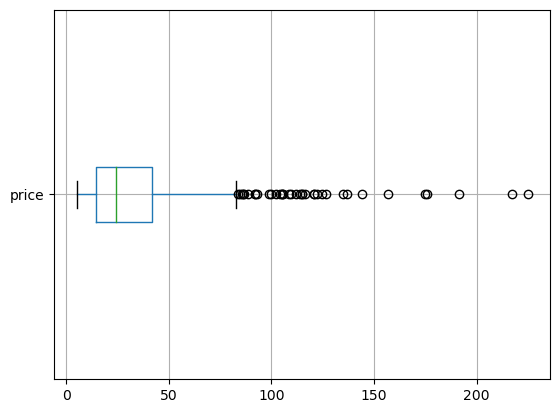

In [37]:
erp.boxplot(column="price", vert=False)
plt.show()

#### Analyse univariée sur les prix

* Création d'un dataframe filtré sur les produits en stock

In [38]:
instock = erp[erp["stock_status"] == "instock"]
instock

,product_id,onsale_web,price,stock_quantity,stock_status
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock
8,4043,1,60.0,12,instock
9,4045,1,42.6,66,instock
11,4047,1,18.3,36,instock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


* Les produits en stock les plus chers

In [39]:
instock[['product_id', 'price','onsale_web', 'stock_quantity', 'stock_status']].sort_values('price', ascending=False).head(10)

,product_id,price,onsale_web,stock_quantity,stock_status
460,5001,217.5,1,20,instock
635,5892,191.3,1,10,instock
227,4402,176.0,1,8,instock
598,5767,175.0,1,12,instock
230,4406,157.0,1,3,instock
411,4904,137.0,1,13,instock
697,6126,135.0,1,10,instock
210,4355,126.5,1,2,instock
556,5612,124.8,1,12,instock
651,5917,122.0,1,4,instock


* Les produits en stock les moins chers

In [40]:
instock[['product_id', 'price','onsale_web', 'stock_quantity']].sort_values('price', ascending=True).head(10)

,product_id,price,onsale_web,stock_quantity
700,6129,5.2,1,30
605,5777,5.7,1,132
100,4172,5.7,1,167
101,4173,5.7,1,100
102,4174,5.7,1,94
607,5779,5.8,1,211
606,5778,5.8,1,36
123,4200,5.8,1,190
122,4198,5.8,1,105
309,4680,6.3,1,34


* Histogramme des prix des produits en stock

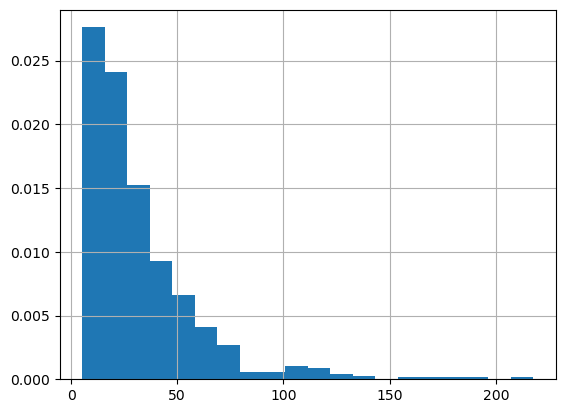

In [41]:
instock["price"].hist(density=True,bins=20)
plt.show()